In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [6]:
#Create sea-level prediction scatter plot
def draw_plot():
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    plt.figure(figsize=(15,10))
    plt.scatter(x, y)
    
    # Create first line of best fit and calculate slope and y-intercept (Red)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_future = np.arange(1880, 2051)
    best_fit_line = slope * x_future + intercept
    plt.plot(x_future, best_fit_line, color='red')

    # Create second line of best fit, prediction from year 2000 data onwards (Green)
    df2 = df.loc[df['Year']>= 2000]
    x2 = df2['Year']
    y2 = df2['CSIRO Adjusted Sea Level']
    slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
    new_x_future = np.arange(2000, 2051)
    new_best_fit_line = slope * new_x_future + intercept
    
    plt.plot(new_x_future, new_best_fit_line, color='green')
    

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (Inches)')
    plt.title('Rise in Sea Level')
    
    # Save plot
    plt.savefig('sea_level_plot.png')
    #return plt.gca()

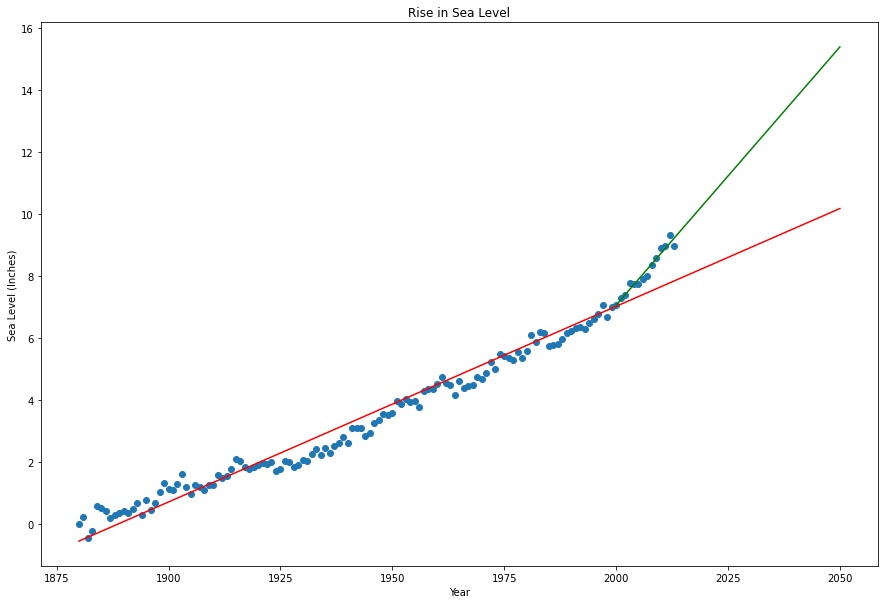

In [7]:
draw_plot()